In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps

# Google developer API key
from config import gkey
# Configure gmaps
gmaps.configure(api_key=gkey)


# File to Load
crimes_data = "chicago_crimes.csv"

# Read the Crimes Data
crimes_data_df = pd.read_csv(crimes_data)


# Display the data table for preview
crimes_data_df.head()


,Unnamed: 0,ID,Primary Type,Location Description,Arrest,Ward,Year,Latitude,Longitude
0,0,10000092,BATTERY,STREET,False,28.0,2015,41.891399,-87.744385
1,1,10000094,OTHER OFFENSE,STREET,True,15.0,2015,41.773372,-87.665319
2,2,10000095,BATTERY,APARTMENT,False,4.0,2015,41.813861,-87.596643
3,3,10000096,BATTERY,APARTMENT,False,3.0,2015,41.800802,-87.622619
4,4,10000097,ROBBERY,SIDEWALK,False,28.0,2015,41.878065,-87.743354


In [2]:
# Combining similar offenses together
crimes_data_df["Primary Type"] = crimes_data_df["Primary Type"].replace(
   {"THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
    "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
    "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
    "OTHER OFFENSES", "GAMBLING":"OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
    "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
    "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
    "NON-CRIMINAL": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
    "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES","PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
    "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES", "DOMESTIC VIOLENCE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "HOMICIDE": "OTHER OFFENSES"})




In [3]:

#Number of Unique Crimes

crimes_count = crimes_data_df.groupby('Primary Type')['ID'].nunique()
crimes_count_df = pd.DataFrame(crimes_count)


#Rename:
crimes_analysis_df = crimes_count_df.rename(columns={"ID": "Number of Crimes"})

crimes_analysis_df


,Number of Crimes
Primary Type,
ASSAULT,1651012
CRIMINAL DAMAGE,963037
DECEPTIVE PRACTICE,255057
NARCOTICS,706113
OTHER OFFENSES,639863
SEX CRIMES,92631
THEFT & ROBBERY,2339064


In [4]:
#Percentages:
#------------
#total number of crimes
total_crimes = crimes_analysis_df['Number of Crimes'].sum()
crime_type = crimes_analysis_df['Number of Crimes']

#Percentage of Total Fares
crime_percentage = round((crime_type)*100/(total_crimes),2)
crime_percentage_df = pd.DataFrame(crime_percentage)

#Reset the index of Crimes Analysis DataFrame, to get the Crime Types as column and not index
#crime_percentage_df = crime_percentage_df.reset_index(drop=False)

#Rename:
crime_percentage_df = crime_percentage_df.rename(columns={"Number of Crimes": "Percentage of Crimes"})


crime_percentage_df 

,Percentage of Crimes
Primary Type,
ASSAULT,24.84
CRIMINAL DAMAGE,14.49
DECEPTIVE PRACTICE,3.84
NARCOTICS,10.62
OTHER OFFENSES,9.63
SEX CRIMES,1.39
THEFT & ROBBERY,35.19


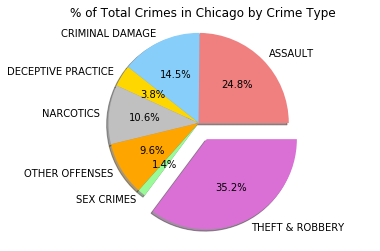

In [5]:
#PIE CHART:
#Labels:
type_list = crime_percentage_df.keys()

# Seperate the "Urban" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.2)

#colors
colors = ("lightcoral", "lightskyblue", "gold", "silver", "orange", "palegreen", "orchid")

# Build Pie Chart
crimes_pie = crime_percentage_df.plot(kind="pie", y=type_list, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True, title=("% of Total Crimes in Chicago by Crime Type"))
crimes_pie.set_ylabel("")



#remove legend
plt.gca().legend_.remove()

# Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../crimes_pie.png")

# Print our pie chart to the screen
plt.show()


In [6]:
#THEFT & ROBBERY by Year
loc_theft = crimes_data_df.loc[crimes_data_df["Primary Type"] == "THEFT & ROBBERY", :]
robbery_year = loc_theft.groupby('Year')['Primary Type'].count()
robbery_year = pd.DataFrame(robbery_year)

robbery_year = robbery_year.drop(robbery_year.index[-1])
robbery_year = robbery_year.reset_index(drop=False)
nb_robbery = robbery_year["Primary Type"]
robbery_year.head()



,Year,Primary Type
0,2001,171265
1,2002,167593
2,2003,164111
3,2004,158810
4,2005,149733


In [7]:
#CRIMINAL DAMAGE by Year
loc_damage = crimes_data_df.loc[crimes_data_df["Primary Type"] == "CRIMINAL DAMAGE", :]
damage_year = loc_damage.groupby('Year')['Primary Type'].count()
damage_year = pd.DataFrame(damage_year)

damage_year = damage_year.drop(damage_year.index[-1])
damage_year.head()
#line plots
#Reset the index of the DataFrame, to get the Years as column and not index
damage_year = damage_year.reset_index(drop=False)

damage_nb = damage_year["Primary Type"]


In [8]:
#ASSAULT by Year
loc_assault= crimes_data_df.loc[crimes_data_df["Primary Type"] == "ASSAULT", :]
assault_year = loc_assault.groupby('Year')['Primary Type'].count()
assault_year = pd.DataFrame(assault_year)

assault_year = assault_year.drop(assault_year.index[-1])


assault_year = assault_year.reset_index(drop=False)
nb_assault = assault_year["Primary Type"]
assault_year.head()


,Year,Primary Type
0,2001,126627
1,2002,127503
2,2003,119449
3,2004,117555
4,2005,112577


In [9]:
#NARCOTICS by Year
loc_drugs= crimes_data_df.loc[crimes_data_df["Primary Type"] == "NARCOTICS", :]
drugs_year = loc_drugs.groupby('Year')['Primary Type'].count()
drugs_year = pd.DataFrame(drugs_year)

drugs_year = drugs_year.drop(drugs_year.index[-1])
drugs_year.head()

drugs_year = drugs_year.reset_index(drop=False)
nb_drugs = drugs_year["Primary Type"]


In [10]:
#DECEPTIVE PRACTICE by Year
loc_dec= crimes_data_df.loc[crimes_data_df["Primary Type"] == "DECEPTIVE PRACTICE", :]
dec_year = loc_dec.groupby('Year')['Primary Type'].count()
dec_year = pd.DataFrame(dec_year)

dec_year = dec_year.drop(dec_year.index[-1])
dec_year.head()

dec_year = dec_year.reset_index(drop=False)
nb_dec = dec_year["Primary Type"]


In [11]:
#SEX CRIMES by Year
loc_sexcrimes= crimes_data_df.loc[crimes_data_df["Primary Type"] == "SEX CRIMES", :]
sexcrimes_year = loc_sexcrimes.groupby('Year')['Primary Type'].count()
sexcrimes_year = pd.DataFrame(sexcrimes_year)

sexcrimes_year = sexcrimes_year.drop(sexcrimes_year.index[-1])
sexcrimes_year.head()

sexcrimes_year = sexcrimes_year.reset_index(drop=False)
nb_sexcrimes = sexcrimes_year["Primary Type"]

In [12]:
#OTHER OFFENSES by Year

loc_other= crimes_data_df.loc[crimes_data_df["Primary Type"] == "OTHER OFFENSES", :]
other_year = loc_other.groupby('Year')['Primary Type'].count()
other_year = pd.DataFrame(other_year)

other_year = other_year.drop(other_year.index[-1])
other_year.head()

other_year = other_year.reset_index(drop=False)
nb_other = other_year["Primary Type"]
other_year.head()

,Year,Primary Type
0,2001,44017
1,2002,46718
2,2003,45573
3,2004,43562
4,2005,41760


Text(0,0.5,'Number of Crimes')

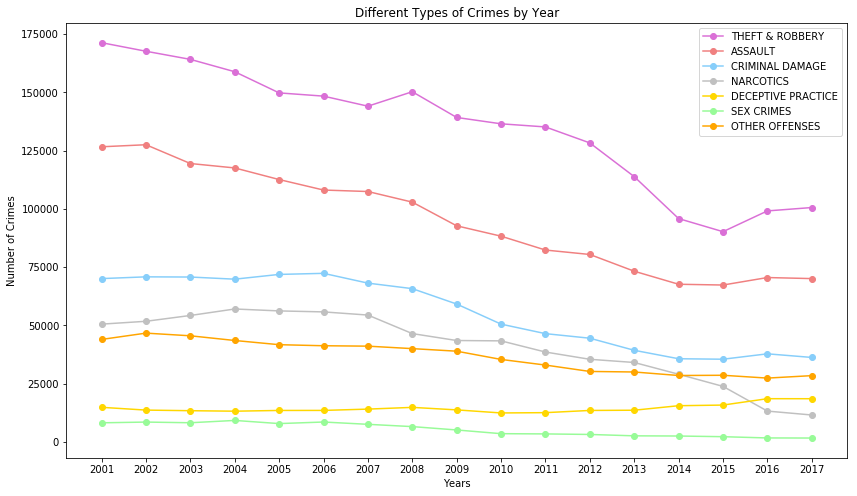

In [13]:
#line plots : Different Types of Crimes by Year
#Reset the index of the DataFrame, to get the Years as column and not index
year_list = robbery_year["Year"]

x_axis = np.arange(17)
tick_locations = [x for x in x_axis]
    
fig = plt.figure(figsize=(14, 8))    

plt.plot(x_axis, nb_robbery, color="orchid", marker="o", label="THEFT & ROBBERY")
plt.plot(x_axis, nb_assault, color="lightcoral", marker="o", label="ASSAULT")
plt.plot(x_axis, damage_nb, color="lightskyblue", marker="o", label="CRIMINAL DAMAGE ")
plt.plot(x_axis, nb_drugs, color="silver", marker="o", label="NARCOTICS")
plt.plot(x_axis, nb_dec, color="gold", marker="o", label="DECEPTIVE PRACTICE")
plt.plot(x_axis, nb_sexcrimes, color="palegreen", marker="o", label="SEX CRIMES")
plt.plot(x_axis, nb_other, color="orange", marker="o", label="OTHER OFFENSES")




plt.xticks(tick_locations, year_list)

plt.legend(loc="best")
# Give our chart some labels and a tile
plt.title("Different Types of Crimes by Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")


In [14]:
#dataframe for nb of arrests:
crimes_data_df["Arrest"] = crimes_data_df["Arrest"].astype('str') 


In [15]:
arrests_crimes_df = crimes_data_df.loc[crimes_data_df["Arrest"] == "True", :]

#Number of Arrests

arrest_count = arrests_crimes_df.groupby('Primary Type')['Arrest'].count()
arrest_count_df = pd.DataFrame(arrest_count)
#Rename:
arrest_count_df  = arrest_count_df.rename(columns={"Arrest": "Number of Arrests"})
arrest_count_df 

,Number of Arrests
Primary Type,
ASSAULT,376630
CRIMINAL DAMAGE,195650
DECEPTIVE PRACTICE,43721
NARCOTICS,701822
OTHER OFFENSES,216606
SEX CRIMES,75397
THEFT & ROBBERY,241911


In [16]:
#merge arrests and crimes:
arrests_crimes = pd.merge(crimes_analysis_df,arrest_count_df, on="Primary Type")
arrests_crimes

,Number of Crimes,Number of Arrests
Primary Type,,
ASSAULT,1651012,376630
CRIMINAL DAMAGE,963037,195650
DECEPTIVE PRACTICE,255057,43721
NARCOTICS,706113,701822
OTHER OFFENSES,639863,216606
SEX CRIMES,92631,75397
THEFT & ROBBERY,2339064,241911


In [17]:
#reset the index to get the list of crime types
arrests_crimes = arrests_crimes.reset_index(drop=False)
crimes_list =  arrests_crimes["Primary Type"]
crimes_list 

0               ASSAULT
1       CRIMINAL DAMAGE
2    DECEPTIVE PRACTICE
3             NARCOTICS
4        OTHER OFFENSES
5            SEX CRIMES
6       THEFT & ROBBERY
Name: Primary Type, dtype: object

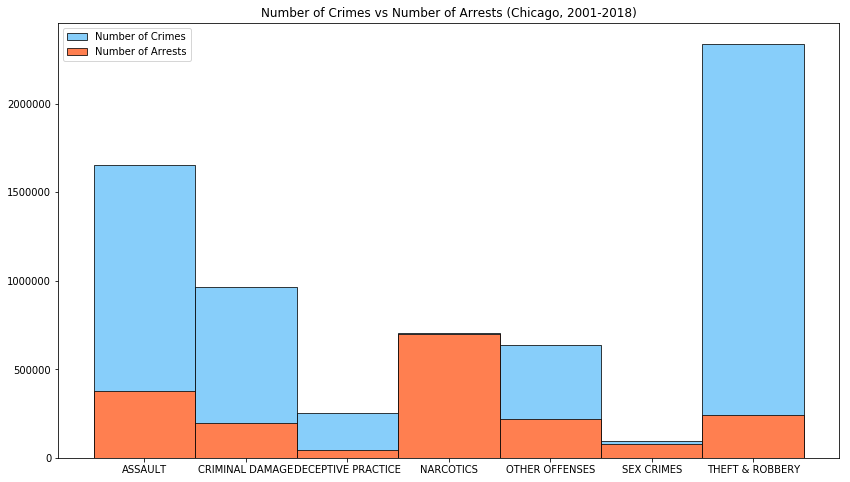

In [23]:
#Visualize: Arrest vs Crimes :
fig = plt.figure(figsize=(14, 8))
nb_crimes= arrests_crimes['Number of Crimes']
nb_arrests= arrests_crimes['Number of Arrests']
x_axis = np.arange(0, len(arrests_crimes))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)



crimes_plt = plt.bar(x_axis,  nb_crimes, width=1.0, label='Number of Crimes', color='lightskyblue', edgecolor="black", linewidth="0.75", align="center")

arrest_plt = plt.bar(x_axis,  nb_arrests, width=1.0, label='Number of Arrests', color='coral', edgecolor="black", linewidth="0.75", align="center")
plt.title(f"Number of Crimes vs Number of Arrests (Chicago, 2001-2018)")

# Set our legend 
lgnd = plt.legend(handles=[crimes_plt, arrest_plt], loc='upper left')

plt.xticks(tick_locations, crimes_list )

plt.savefig("../crimes_arrest_bar.png")

plt.show()

In [19]:
#by year total nb of arrest vs total nb of crimes:
arrest_year = arrests_crimes_df.groupby('Year')['Arrest'].count()
arrest_year_df = pd.DataFrame(arrest_year)
crime_year = crimes_data_df.groupby('Year')['Primary Type'].count()
crime_year_df = pd.DataFrame(crime_year)
#merge the two dataframes:
crime_arrest_year = pd.merge(crime_year_df,arrest_year_df, on="Year")
crime_arrest_year = crime_arrest_year.rename(columns={"Primary Type": "Number of Crimes", "Arrest": "Number of Arrests"})

crime_arrest_year = crime_arrest_year.drop(crime_arrest_year.index[-1])
crime_arrest_year.head()

,Number of Crimes,Number of Arrests
Year,,
2001,485743,141901
2002,486750,141545
2003,475932,141570
2004,469374,144684
2005,453697,140894


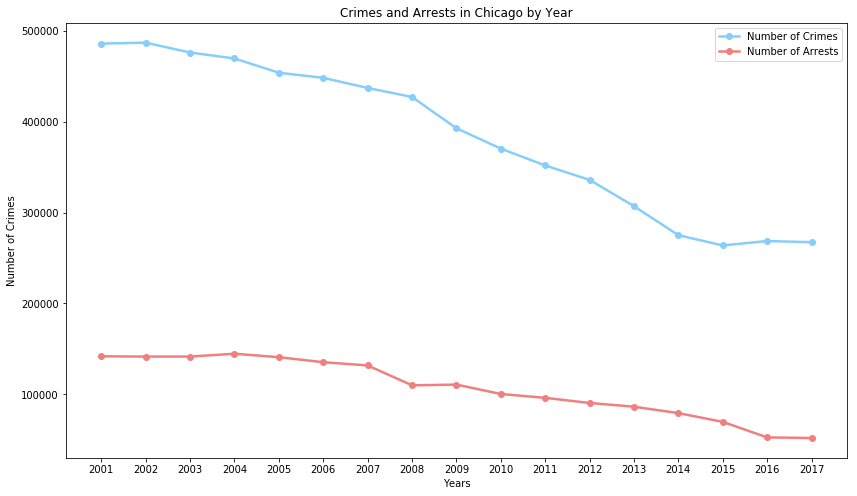

In [20]:
#line plots
#Reset the index of the DataFrame, to get the Years as column and not index
crime_arrest_year = crime_arrest_year.reset_index(drop=False)

year_list = crime_arrest_year["Year"]

x_axis = np.arange(0, len(crime_arrest_year))
y_axis1 = crime_arrest_year["Number of Crimes"]
y_axis2 = crime_arrest_year["Number of Arrests"]

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig = plt.figure(figsize=(14, 8))    
plt.plot(x_axis, y_axis1, color="lightskyblue", linewidth=2.5, linestyle="-", marker="o", label="Number of Crimes")
plt.plot(x_axis, y_axis2, color="lightcoral", linewidth=2.5, linestyle="-", marker="o", label="Number of Arrests")


plt.xticks(tick_locations, year_list)

# Set our legend to where the chart thinks is best
plt.legend(loc='best')

# Give our chart some labels and a tile
plt.title("Crimes and Arrests in Chicago by Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

plt.savefig("../crimes_arrests_years.png")

plt.show()

In [21]:
#dataframe with all crimes by ward
# Store latitude and longitude in locations 
ward_all_df = pd.DataFrame(crimes_data_df.groupby("Ward")["Primary Type"].count())
ward_all_df = ward_all_df.reset_index(drop=False)
ward_all_df.dropna(how='all')
ward_all_df= ward_all_df.sort_values(['Ward'], ascending=True)
# Collect the mean unemployment rates for the world
number_crimes_all = ward_all_df["Primary Type"]

# Collect the years where data was collected
ward_all_keys = ward_all_df["Ward"]

ward_all_df.head()

,Ward,Primary Type
0,1.0,117067
1,2.0,233763
2,3.0,185293
3,4.0,111374
4,5.0,143795


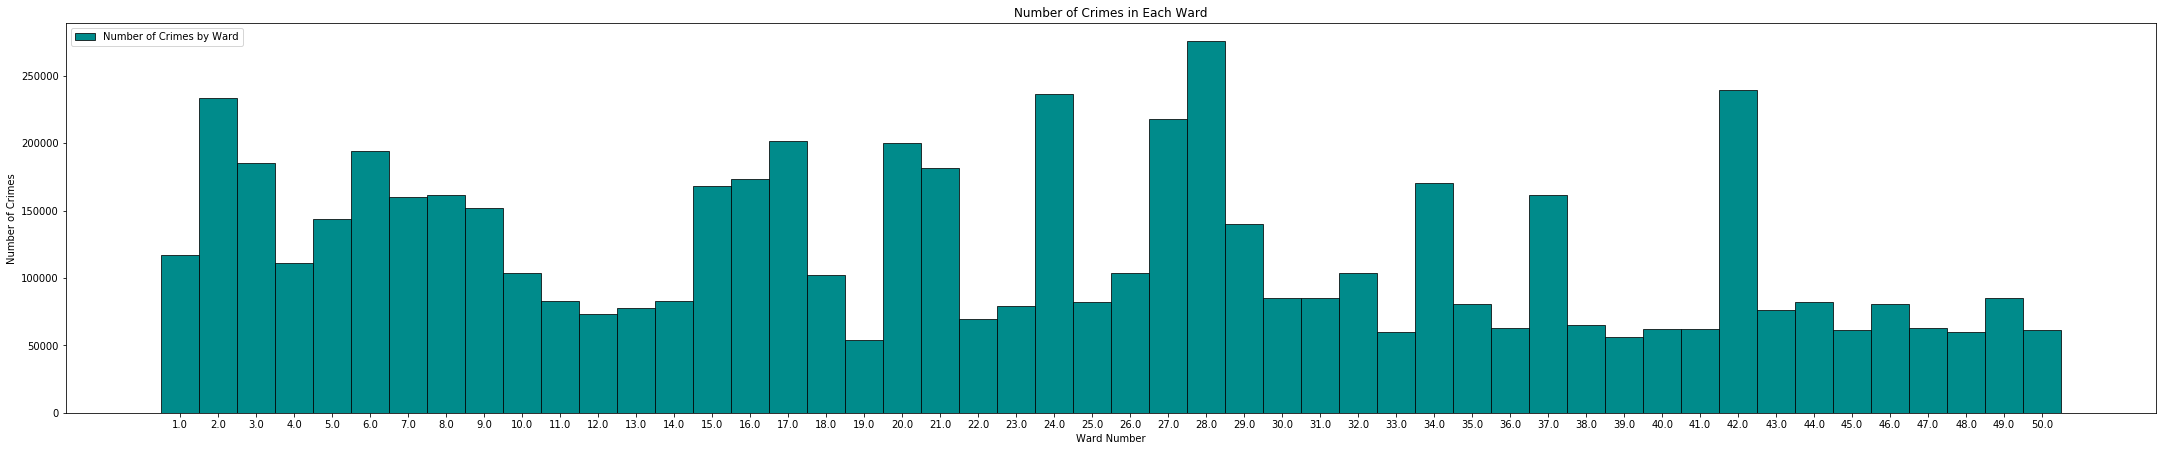

In [24]:

plt.figure(figsize=(30,6))
x_axis = np.arange(len(ward_all_df))

tick_all_locations = [value for value in x_axis]

plt.bar(x_axis, number_crimes_all, width=1.0, color="darkcyan", edgecolor="black", label = "Number of Crimes by Ward", linewidth="0.75", align="center")

plt.xticks(tick_all_locations, ward_all_df["Ward"], rotation="horizontal")
plt.tight_layout()
plt.legend(loc="upper left")
# Give our chart some labels and a tile
plt.title("Number of Crimes in Each Ward")
plt.xlabel("Ward Number")
plt.ylabel("Number of Crimes")

plt.savefig("../crimes_ward.png")

plt.show()


In [25]:
#Ward 28: 
#study the percentages of crimes in the the ward with the highest number of crimes

crimes_data_df["Ward"] = crimes_data_df["Ward"].astype('str') 

ward28_crimes_df = crimes_data_df.loc[crimes_data_df["Ward"] == "28.0", :]


#Number of Unique Crimes

ward28_crimes_count = ward28_crimes_df.groupby('Primary Type')['ID'].nunique()
ward28_crimes_count_df = pd.DataFrame(ward28_crimes_count)


#Rename:
ward28_analysis_df = ward28_crimes_count_df.rename(columns={"ID": "Number of Crimes"})

ward28_analysis_df


,Number of Crimes
Primary Type,
ASSAULT,73473
CRIMINAL DAMAGE,27658
DECEPTIVE PRACTICE,7329
NARCOTICS,74627
OTHER OFFENSES,24187
SEX CRIMES,7886
THEFT & ROBBERY,60274


In [26]:
#Percentages:
#------------
#total number of crimes
ward28_total_crimes = ward28_analysis_df['Number of Crimes'].sum()
ward28_crime_type = ward28_analysis_df['Number of Crimes']

#Percentage of Total Fares
ward28_crime_percentage = round((ward28_crime_type)*100/(ward28_total_crimes),2)
ward28_crime_percentage_df = pd.DataFrame(ward28_crime_percentage)



#Rename:
ward28_crime_percentage_df = ward28_crime_percentage_df.rename(columns={"Number of Crimes": "Percentage of Crimes"})


ward28_crime_percentage_df 

,Percentage of Crimes
Primary Type,
ASSAULT,26.68
CRIMINAL DAMAGE,10.04
DECEPTIVE PRACTICE,2.66
NARCOTICS,27.09
OTHER OFFENSES,8.78
SEX CRIMES,2.86
THEFT & ROBBERY,21.88


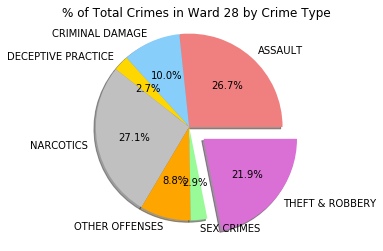

In [42]:
#PIE CHART:
#Labels:
ward28_type_list = ward28_crime_percentage_df.keys()

#colors
colors = ("lightcoral", "lightskyblue", "gold", "silver", "orange", "palegreen", "orchid")

# Seperate the "Urban" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.2)


# Build Pie Chart
ward28_crimes_pie = ward28_crime_percentage_df.plot(kind="pie", y=ward28_type_list, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True, title=("% of Total Crimes in Ward 28 by Crime Type"))
ward28_crimes_pie.set_ylabel("")



#remove legend
plt.gca().legend_.remove()

# Make the pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../ward28_crimes_pie.png")

# Print our pie chart to the screen
plt.show()


In [28]:
#location of all crimes in ward 28 using gmaps
# Store latitude and longitude in locations
#locations_ward28 = ward28_crimes_df[["Latitude","Longitude"]]                             
# Drop all rows with missing informationl
#locations_ward28 = locations_ward28.dropna(how='any')
#locations_ward28 = locations_ward28.reset_index(drop=True)
#locations_ward28.head()


In [29]:
# Plot marker layer
#fig_28 = gmaps.figure(zoom_level = 5, center=(87.6298, 41.8781))

# Create marker layer
#markers_ward28= gmaps.marker_layer(locations_ward28)
# Add layer
#fig_28.add_layer(markers_ward28)

# Save Figure
#plt.savefig("../ward28_crimes_gmaps.png")


# Display figure
#fig_28

In [30]:
#dataframe with only robberies:
theft_crime_df = crimes_data_df.loc[crimes_data_df["Primary Type"] == "THEFT & ROBBERY", :]

# Store latitude and longitude in locations
ward_df = pd.DataFrame(theft_crime_df.groupby("Ward")["Primary Type"].count())
ward_df = ward_df.reset_index(drop=False)
ward_df = ward_df.dropna(how='all')
ward_df= ward_all_df.sort_values(['Ward'], ascending=True)

# Collect the number of crimes

number_crimes = ward_df["Primary Type"]

# Collect the wards where data was collected
ward_keys = ward_df["Ward"]

ward_df.head()

,Ward,Primary Type
0,1.0,117067
1,2.0,233763
2,3.0,185293
3,4.0,111374
4,5.0,143795


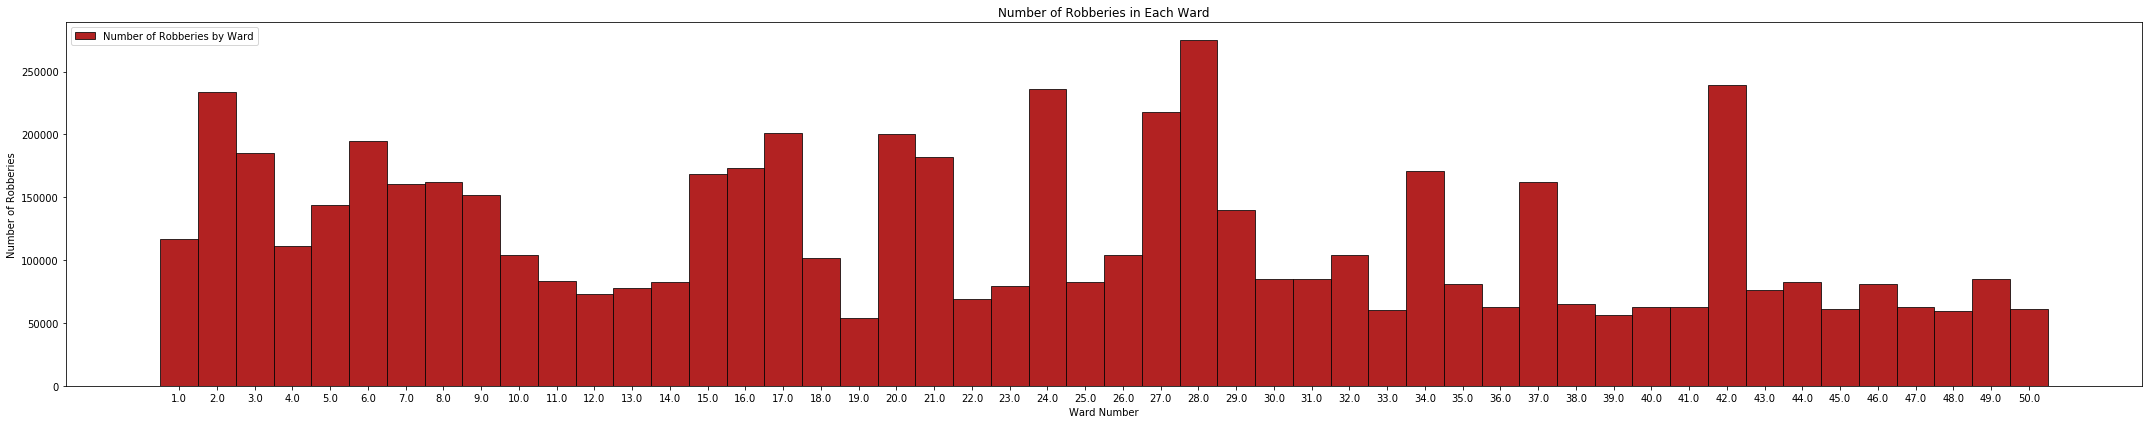

In [31]:
plt.figure(figsize=(30,6))

x_axis = np.arange(len(ward_df))

tick_locations = [value for value in x_axis]

plt.bar(x_axis, number_crimes, width=1.0, color="firebrick", edgecolor="black", label = "Number of Robberies by Ward", linewidth="0.75", align="center")
plt.xlabel("Ward")
plt.xticks(tick_locations, ward_df["Ward"], rotation="horizontal")

plt.legend(loc="upper left")
# Give our chart some labels and a tile
plt.title("Number of Robberies in Each Ward")
plt.xlabel("Ward Number")
plt.ylabel("Number of Robberies")

plt.tight_layout()

plt.savefig("../robbery_ward.png")

plt.show()


In [32]:
#Ward 42:
#year with the highest increase of robbery in this ward:
#scatter plot with nb of robberies  
#dataframe for nb of arrests:
crimes_data_df["Ward"] = crimes_data_df["Ward"].astype('str') 

ward42_crimes_df = crimes_data_df.loc[crimes_data_df["Ward"] == "42.0", :]
theft_42_df = ward42_crimes_df.loc[ward42_crimes_df["Primary Type"] == "THEFT & ROBBERY", :]

# Store latitude and longitude in locations 
year_theft42 = pd.DataFrame(theft_42_df.groupby('Year')["Primary Type"].count())                          

year_theft42= year_theft42.drop(year_theft42.index[0])
year_theft42 = year_theft42.drop(year_theft42.index[-1])

year_theft42.head()



,Primary Type
Year,
2002,7516
2003,9382
2004,9164
2005,8093
2006,8103


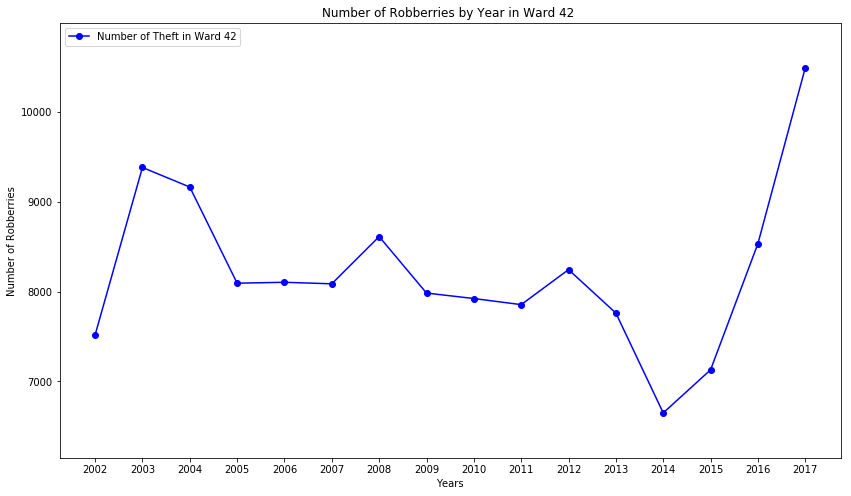

In [33]:
#line plots
#Reset the index of the DataFrame, to get the Years as column and not index
year_theft42 = year_theft42.reset_index(drop=False)

year_list42 = year_theft42["Year"]

x_axis = np.arange(0, len(year_theft42))
y_axis = year_theft42["Primary Type"]

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig = plt.figure(figsize=(14, 8))    
#label="Number of Thefts"

plt.plot(x_axis, y_axis, color="blue", marker="o", label="Number of Theft in Ward 42")

plt.ylim(min(y_axis)-500, max(y_axis)+500)

plt.xticks(tick_locations, year_list42)

plt.legend(loc="upper left")
# Give our chart some labels and a tile
plt.title("Number of Robberries by Year in Ward 42 ")
plt.xlabel("Years")
plt.ylabel("Number of Robberries")

plt.savefig("../theft_ward42_year.png")

plt.show()

